<a href="https://colab.research.google.com/github/JanechrisDataAnalyst/Practical-projects/blob/main/CNN_on_Cifar_10_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Dataset

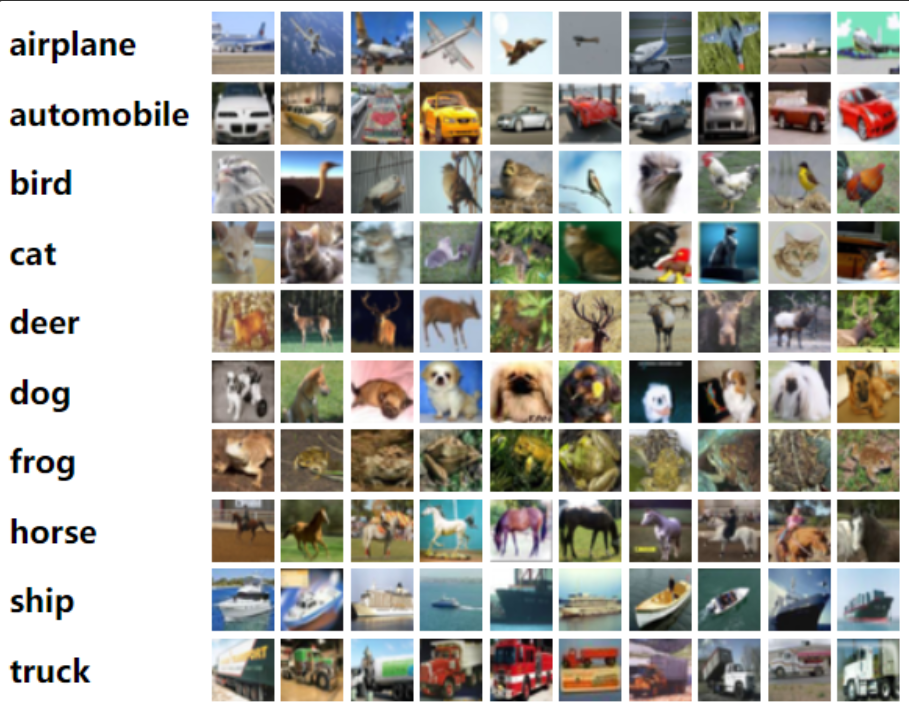

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train, Y_train), (X_test, Y_test)= cifar10.load_data()

# Preprocessing:

In [ ]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [ ]:
# Display the image and the label:
class_labels = ["ariplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
index = 1
plt.figure(figsize= (5,5))
plt.imshow(X_train[index])
plt.title(class_labels[Y_train[index][0]])
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Normlizing:
X_train = X_train/ 255
X_test = X_test/ 255

## onehot encoding:
0: Airplane

1: Automobile

2: bird

...
- Airplane: [1,0,0,0,0,0,0,0]
- Automobile: [0,1,0,0,0,0,0,0]
- bird: [0,0,1,0,0,0,0,0,0,]


In [ ]:
Y_train_en = to_categorical(Y_train, 10)
Y_test_en = to_categorical(Y_test, 10)

NameError: name 'to_categorical' is not defined

In [ ]:
Y_test_en

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# CNN implementation:

In [ ]:
model = Sequential()

model.add(Conv2D(32,(4,4), input_shape= (32,32, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Conv2D(32,(4,4), input_shape= (32,32, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

# Flatten
model.add(Flatten())

# hidden layer:
model.add(Dense(128, activation = "relu"))

# Output layer:
model.add(Dense(10, activation= "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics= ["accuracy"])

In [ ]:
model.fit(X_train, Y_train_en, epochs = 20, verbose= 1 , validation_data= (X_test, Y_test_en))

Epoch 1/20
1563/1563 [==============================] - 61s 37ms/step - loss: 1.4989 - accuracy: 0.4591 - val_loss: 1.2731 - val_accuracy: 0.5477
Epoch 2/20
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1847 - accuracy: 0.5799 - val_loss: 1.1220 - val_accuracy: 0.5990
Epoch 3/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0481 - accuracy: 0.6331 - val_loss: 1.0454 - val_accuracy: 0.6376
Epoch 4/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9506 - accuracy: 0.6680 - val_loss: 1.0171 - val_accuracy: 0.6455
Epoch 5/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8816 - accuracy: 0.6937 - val_loss: 0.9945 - val_accuracy: 0.6531
Epoch 6/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8182 - accuracy: 0.7161 - val_loss: 0.9875 - val_accuracy: 0.6523
Epoch 7/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7617 - accuracy: 0.7337 - val_loss: 0.9563 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1